In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

In [2]:
men = np.loadtxt("men.dat")
women = np.loadtxt("women.dat")
humen = np.concatenate((men, women))

In [3]:
step = 5
bins = np.arange(np.min(humen), np.max(humen) + step, step)

bins_mid = np.zeros(len(bins)-1)
for i in range(len(bins_mid)):
    bins_mid[i] = (bins[i] + bins[i+1])/2
    
hist_m, bins = np.histogram(men, bins)
hist_w, bins = np.histogram(women, bins)
prob_m = hist_m/(hist_m+hist_w)


<function matplotlib.pyplot.show(close=None, block=None)>

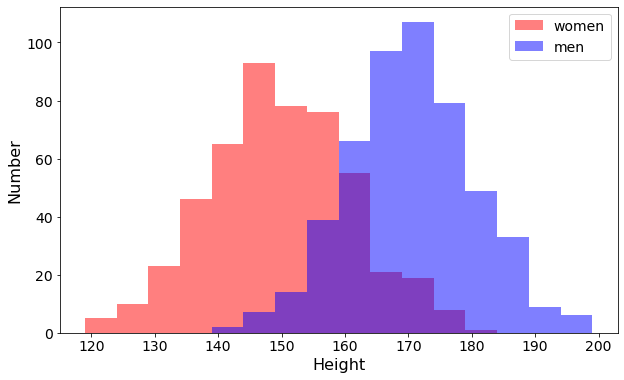

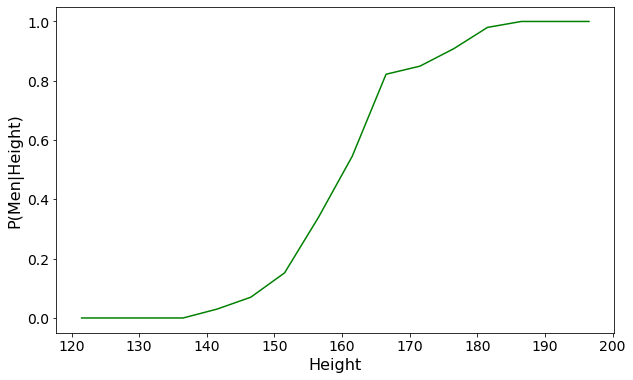

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(women, bins=bins, color='red', alpha=0.5, label='women')
plt.hist(men, bins=bins, color='blue', alpha=0.5, label='men')
# plt.plot(bins_mid, hist_w, '-r', label='women')
# plt.plot(bins_mid, hist_m, '-b', label='men')
plt.legend(loc='upper right', fontsize=14)
plt.xlabel('Height', size=16)
plt.ylabel('Number', size=16)
plt.tick_params(labelsize=14)
plt.show

plt.figure(figsize=(10, 6))
plt.plot(bins_mid, prob_m, '-g')
plt.xlabel('Height', size=16)
plt.ylabel('P(Men|Height)', size=16)
plt.tick_params(labelsize=14)
plt.show

Best fit parameter =  [-29.87441761   0.18647521]
P = 0.5 at x =  160.20583924379693


<function matplotlib.pyplot.show(close=None, block=None)>

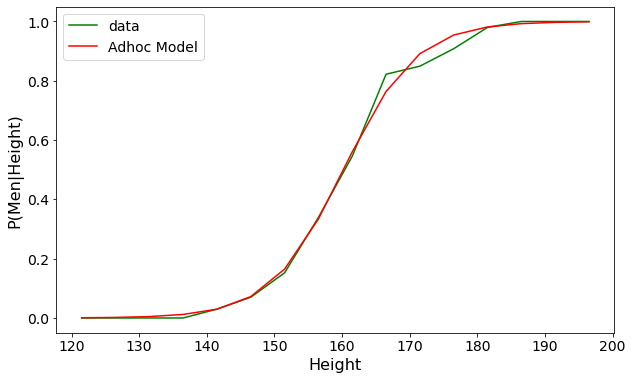

In [5]:
def logistic(beta, x):
    ex = np.exp(beta[0] + beta[1]*x)
    logistic = ex / (1 + ex)
    return logistic


def res(beta, x, prob):
    prob_model = logistic(beta, x)
    res = np.sum((prob - prob_model)**2)
    return res


beta0 = [0, 0]
res_adhoc = minimize(res, beta0, args=(bins_mid, prob_m))
beta_adhoc = res_adhoc.x
x_adhoc = -beta_adhoc[0]/beta_adhoc[1]

print('Best fit parameter = ', beta_adhoc)
print("P = 0.5 at x = ", x_adhoc)

plt.figure(figsize=(10, 6))
plt.plot(bins_mid, prob_m, '-g', label='data')
plt.plot(bins_mid, logistic(beta_adhoc, bins_mid), '-r', label='Adhoc Model')
plt.legend(loc='upper left', fontsize=14)
plt.xlabel('Height', size=16)
plt.ylabel('P(Men|Height)', size=16)
plt.tick_params(labelsize=14)
plt.show

Best fit parameter =  [-29.6733334    0.18500613]
P = 0.5 at x =  160.39107886277463


<function matplotlib.pyplot.show(close=None, block=None)>

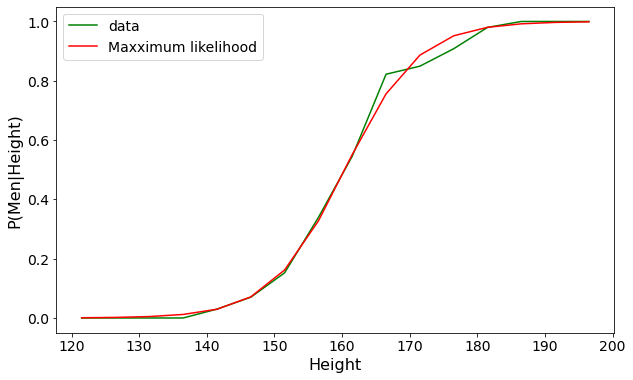

In [6]:
def minus_log_likelihood(beta, men, women):
    p_m = logistic(beta, men)
    p_w = logistic(beta, women)
    loglike = np.sum(np.log(p_m)) + np.sum(np.log(1-p_w))
    return -loglike


beta0 = [0, 0]
res_maxlike = minimize(minus_log_likelihood, beta0, args=(men, women), method='Nelder-Mead')
beta_maxlike = res_maxlike.x
x_maxlike = -beta_maxlike[0]/beta_maxlike[1]

print('Best fit parameter = ', beta_maxlike)
print("P = 0.5 at x = ", x_maxlike)

plt.figure(figsize=(10, 6))
plt.plot(bins_mid, prob_m, '-g', label='data')
plt.plot(bins_mid, logistic(beta_maxlike, bins_mid), '-r', label='Maxximum likelihood')
plt.legend(loc='upper left', fontsize=14)
plt.xlabel('Height', size=16)
plt.ylabel('P(Men|Height)', size=16)
plt.tick_params(labelsize=14)
plt.show

In [7]:
min(women)

119.0

<function matplotlib.pyplot.show(close=None, block=None)>

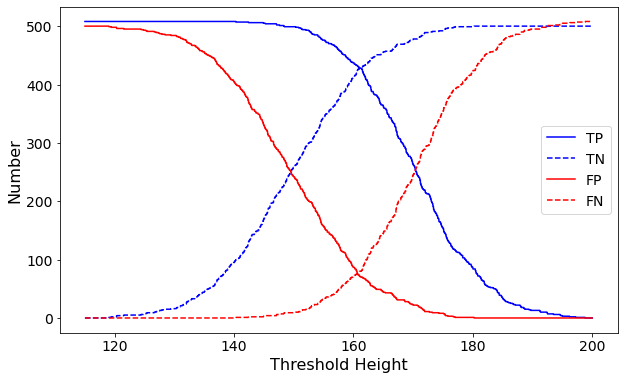

In [24]:
def classify(x_threshold, men, women):
    tp = np.count_nonzero(men >= x_threshold)
    fn = np.count_nonzero(men < x_threshold)
    fp = np.count_nonzero(women >= x_threshold)
    tn = np.count_nonzero(women < x_threshold)
    return tp, tn, fp, fn


npoint = 5000
x_threshold_array = np.linspace(115, 200, npoint)
tp_array = np.zeros(npoint)
tn_array = np.zeros(npoint)
fp_array = np.zeros(npoint)
fn_array = np.zeros(npoint)

for i in range(npoint):
    x_threshold = x_threshold_array[i]
    tp, tn, fp, fn = classify(x_threshold, men, women)
    tp_array[i] = tp
    tn_array[i] = tn
    fp_array[i] = fp
    fn_array[i] = fn


plt.figure(figsize=(10, 6))
plt.plot(x_threshold_array, tp_array, '-b', label='TP')
plt.plot(x_threshold_array, tn_array, '--b', label='TN')
plt.plot(x_threshold_array, fp_array, '-r', label='FP')
plt.plot(x_threshold_array, fn_array, '--r', label='FN')

plt.legend(loc='center right', fontsize=14)
plt.xlabel('Threshold Height', size=16)
plt.ylabel('Number', size=16)
plt.tick_params(labelsize=14)
plt.show

<ipython-input-45-e3fc3ea892c4>:4: RuntimeWarning: invalid value encountered in true_divide
  pre_array = tp_array / (tp_array + fp_array)


<function matplotlib.pyplot.show(close=None, block=None)>

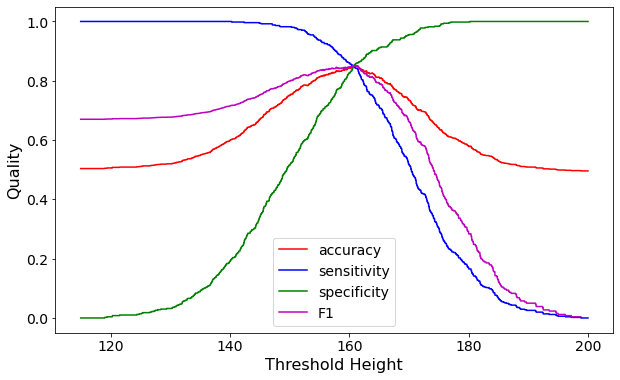

In [45]:
acc_array = (tp_array + tn_array) / (tp_array + tn_array + fp_array + fn_array)
sens_array = tp_array / (tp_array + fn_array) # recall, tpr
spec_array = tn_array / (tn_array + fp_array) # tnr
pre_array = tp_array / (tp_array + fp_array)
f1_array = 2 * pre_array * sens_array / (pre_array + sens_array)
fpr =  1 - spec_array

plt.figure(figsize=(10, 6))
plt.plot(x_threshold_array, acc_array, '-r', label='accuracy')
plt.plot(x_threshold_array, sens_array, '-b', label='sensitivity')
plt.plot(x_threshold_array, spec_array, '-g', label='specificity')
plt.plot(x_threshold_array, f1_array, '-m', label='F1')
plt.legend(loc='lower center', fontsize=14)
plt.xlabel('Threshold Height', size=16)
plt.ylabel('Quality', size=16)
plt.tick_params(labelsize=14)
plt.show


AUC =  0.9154232283464567


<function matplotlib.pyplot.show(close=None, block=None)>

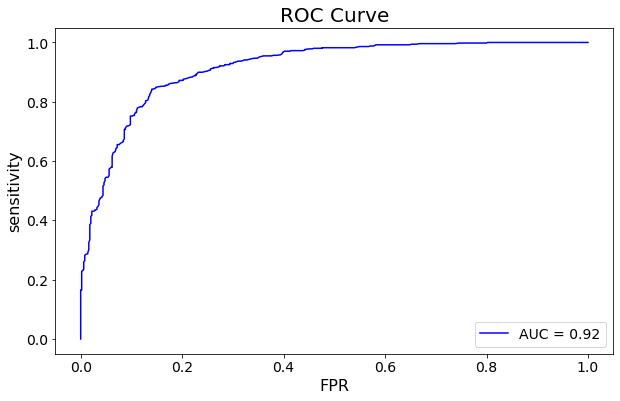

In [60]:
from sklearn.metrics import auc
AUC = auc(fpr, sens_array)
print('AUC = ', AUC)

plt.figure(figsize=(10, 6))
plt.plot(fpr, sens_array, '-b', label='AUC = 0.92')

plt.legend(loc='lower right', fontsize=14)
plt.title('ROC Curve', size=20)
plt.xlabel('FPR', size=16)
plt.ylabel('sensitivity', size=16)
plt.tick_params(labelsize=14)
plt.show


AP =  nan


<function matplotlib.pyplot.show(close=None, block=None)>

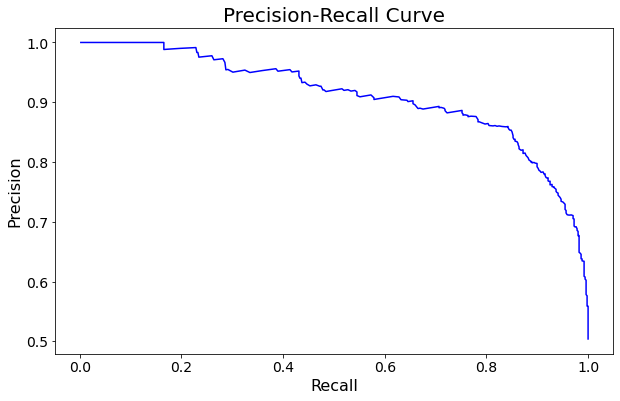

In [59]:
AP = auc(sens_array, pre_array)
print('AP = ', AP)

plt.figure(figsize=(10, 6))
plt.plot(sens_array, pre_array, '-b')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=16)
plt.ylabel('Precision', size=16)
plt.tick_params(labelsize=14)
plt.show
